# Case Study 3 : Data Mining in Image Data

**Dataset used in this case study:** 
* MNIST dataset



# Data Science Problem -- Digit Recognition

For this case study, we will use the mnist dataset to train models for handwritten digit recognition. This is a classic and straightforward problem that the mnist dataset is commonly used for. This will give us some hands on experience with image processing and some further practice implementing various ML models and neural networks.

This problem is important and interestin due to its practically to real world issues. For example, such a model could be useful for bank check processing, mail sorting, and various other problems that require automated digit classification. 

To implement this solution, we will take the following steps:

1. Data Preprocessing
2. EDA
3. Model Building/Training
4. Evaluation and Model Tuning
5. Results Analysis

# Data Collection/Processing: 

In [10]:
# import packages
import pandas as pd
from keras.datasets import mnist

# load mnist dataset
# Given the nature of the dataset, we will split the image data into training and testing sets
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Printing the shape of the vectors
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


We now need to process our data so that it can be used to train deep learning models. Keras models expect input in the form:

        (num_samples, image_height, image_width, num_channels)

So we will adjust the data to fit this criteria.

We will also normalize the data so that the input data are on a similar scale. Currently, the pixel values in the MNIST images are between 0 and 255 -- so we will scale these values to a range of 0 to 1.

Lastly, we will categorize the labels. This way, our model will be able to output a probability for each possible class. To do this we will convert the labels to categorical format.

In [13]:
from keras.utils import to_categorical

# Reshaping the data
train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))

# Normalizing the data
train_X = train_X.astype('float32') / 255
test_X = test_X.astype('float32') / 255

# One hot encoding the labels
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

Now that our data is ready for model training, we can further explore the dataset.

# Data Exploration: Exploring the your data

We'll start by plotting some of the images from the dateset

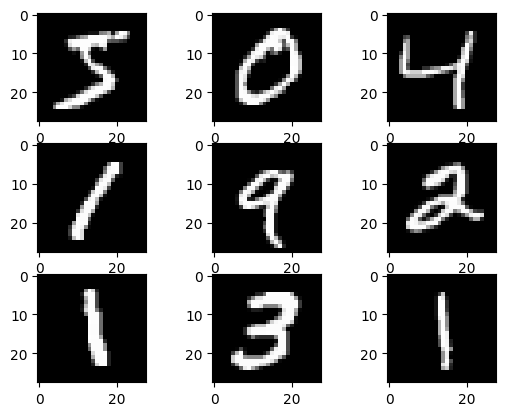

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# plotting some of the data
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))

plt.show()

Now, we'll show the distribution of the labels

0 count: 5923
1 count: 6742
2 count: 5958
3 count: 6131
4 count: 5842
5 count: 5421
6 count: 5918
7 count: 6265
8 count: 5851
9 count: 5949


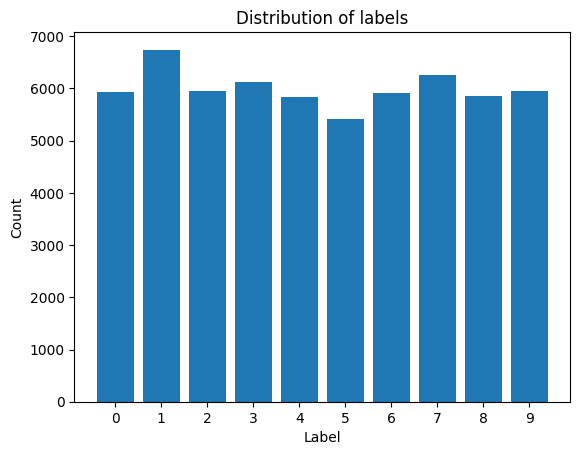

In [29]:
# Use argmax to get label from the array
labels = np.argmax(train_y, axis=1)

# Count the number of each label
counts = np.bincount(labels)
for i, j in enumerate(counts):
    print(f"{i} count: {j}")

# Plot each label count
plt.bar(range(10), counts, tick_label=range(10))
plt.title('Distribution of labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [31]:
# Print average and standard deviation of the label counts
print(f"Average count: {np.mean(counts)}")
print(f"Standard deviation: {np.std(counts)}")

Average count: 6000.0
Standard deviation: 322.082908581005


From this, we can see that all labels have a good amount of training data for each. We see the most amount of 1's with 6742 labels, and 5 is the least with 5421. The mean count for each labels is 6000 -- which should be sufficient to train an accurate deep learning model.

# Model Training

The goal of the solution is to build a model that can accurately recognize handwritten digits. We are using deep learning models because they have been proven to be effective for image classification tasks. We will train the following three models and compare the results:

1. Convolutional Neural Network - CNN's are ideal for image processing as they are built to handle grid like input. My thesis is that this will be our best performing model.
2. Multilayer Perceptron - MLPs are a good baseline model because they are relatively simple and easy to train.
3. Recurrent Neural Network - Lastly, we'll implement an RNN. RNNs are typically used for text or time series analysis but we can modify our data so that the model can handle the input.

The goal is to train a model with at least 90% accuracy. Given our dataset, this will be challenging yet achievable.

## CNN



In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create the model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model.add(MaxPooling2D((2,2)))
cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D((2,2)))
cnn_model.add(Dropout(.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(.5))
cnn_model.add(Dense(10, activation='softmax'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
cnn_model.fit(train_X, train_y, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 10s 10ms/step - loss: 0.3552 - accuracy: 0.8894
Epoch 2/10
938/938 [==============================] - 10s 10ms/step - loss: 0.1423 - accuracy: 0.9579
Epoch 3/10
938/938 [==============================] - 11s 12ms/step - loss: 0.1059 - accuracy: 0.9690
Epoch 4/10
938/938 [==============================] - 12s 13ms/step - loss: 0.0900 - accuracy: 0.9736
Epoch 5/10
938/938 [==============================] - 12s 13ms/step - loss: 0.0784 - accuracy: 0.9765
Epoch 6/10
938/938 [==============================] - 12s 13ms/step - loss: 0.0707 - accuracy: 0.9790
Epoch 7/10
938/938 [==============================] - 12s 13ms/step - loss: 0.0625 - accuracy: 0.9820
Epoch 8/10
938/938 [==============================] - 12s 13ms/step - loss: 0.0571 - accuracy: 0.9828
Epoch 9/10
938/938 [==============================] - 12s 13ms/step - loss: 0.0536 - accuracy: 0.9834
Epoch 10/10
938/938 [==============================] - 12s 13ms/step - loss: 0.051

In [36]:
# Evaluating the model
loss, accuracy = cnn_model.evaluate(test_X, test_y)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0233 - accuracy: 0.9923
Loss: 0.023274937644600868
Accuracy: 0.9922999739646912


### Model Breakdown

Here is a breakdown of each of the layers we used to build the CNN:

1. Conv2D(filters, filter_size, activation, input_shape) Layers - this is a 2D convolutional layer with a set number of filters. We use 'relu' activation function to introduce non linearity to the model.
2. MaxPooling2D((height, weight)) Layers - This is the max pooling layer. This reduces the spatial dimensions of the input by taking the maximum value of a 2x2 (or whatever input) window
3. Dropout Layers - dropout layers are added to prevent overfitting. These randomly set a number of the inputs to 0 during training time
4. Flatten Layer - This layer flattens the input. Used to convert the 2D output of the previous layers to a 1D vector so that it can be processed by the dense layer
5. Dense Layers - These are the fully connected layers. We use the 'relu' activation function in the first dropout layer, but set it so 'softmax' for the final dense layer -- which is the output layer

## Multilayer Perceptron (MLP)

In [38]:
# Define the model
mlp_model = Sequential()
mlp_model.add(Flatten(input_shape=(28,28,1)))
mlp_model.add(Dense(128, activation='relu'))
mlp_model.add(Dropout(.25))
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dropout(.5))
mlp_model.add(Dense(10, activation='softmax'))

# Compile the model
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
mlp_model.fit(train_X, train_y, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.5876 - accuracy: 0.8206
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2711 - accuracy: 0.9234
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2164 - accuracy: 0.9396
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1769 - accuracy: 0.9510
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1549 - accuracy: 0.9565
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1416 - accuracy: 0.9600
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1294 - accuracy: 0.9634
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1212 - accuracy: 0.9659
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1100 - accuracy: 0.9683
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1062 - accuracy: 0.9694

In [39]:
# Evaluating the model
loss, accuracy = mlp_model.evaluate(test_X, test_y)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0926 - accuracy: 0.9748
Loss: 0.09260661900043488
Accuracy: 0.9747999906539917


### Model Breakdown

Here, we train an MLP. This model is similar to a CNN, but without the convolutional layers. We follow the same protocol of adding a flatten layer, dense layers, and dropout layers.

This model is a bit simpler than our CNN but still produced some very good results.

## Recurrant Neural Network (RNN)

In [41]:
from keras.layers import LSTM

# Define the model
rnn_model = Sequential()
rnn_model.add(LSTM(128, input_shape=(28,28), activation='tanh'))
rnn_model.add(Dropout(.25))
rnn_model.add(Dense(10, activation='softmax'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
rnn_model.fit(train_X, train_y, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 14s 25ms/step - loss: 0.5477 - accuracy: 0.8212
Epoch 2/10
469/469 [==============================] - 15s 32ms/step - loss: 0.1659 - accuracy: 0.9507
Epoch 3/10
469/469 [==============================] - 15s 31ms/step - loss: 0.1128 - accuracy: 0.9664
Epoch 4/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0855 - accuracy: 0.9754
Epoch 5/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0703 - accuracy: 0.9791
Epoch 6/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0573 - accuracy: 0.9830
Epoch 7/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0519 - accuracy: 0.9845
Epoch 8/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0442 - accuracy: 0.9866
Epoch 9/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0400 - accuracy: 0.9881
Epoch 10/10
469/469 [==============================] - 15s 32ms/step - loss: 0.037

In [42]:
# Evaluating the model
loss, accuracy = rnn_model.evaluate(test_X, test_y)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0478 - accuracy: 0.9852
Loss: 0.047758668661117554
Accuracy: 0.9851999878883362


### Model Breakdown

Here, we train a basic RNN model on the dataset. A typical RNN includes one or more LSTM layers. One thing to note is that the input of LSTM layers must have three dimensions, but mnist images have shape (28,28). We treat each image as a sequence of 28 rows (or columns), and each of these has 28 features. So, no reshaping is required for our purposes. However, if we were to have flat vectors we would need to reshape them.

Overall our RNN performed very well which came as a bit of a surprise.

# Results

The results from the three models can be summarized as follows:

CNN: The CNN model performed the best out of the three models, with an accuracy of 99.23% and a loss of 0.0233. This is not surprising as CNNs are particularly well-suited for image classification tasks due to their ability to capture local spatial correlations in the image data.

MLP: The MLP model had an accuracy of 97.48% and a loss of 0.0926. While this is still a good result, it's lower than the CNN model. MLPs are fully connected networks and do not take into account the spatial structure of the image data, which can lead to lower performance on image classification tasks.

RNN: The RNN model had an accuracy of 98.52% and a loss of 0.0478. RNNs are typically used for sequence data and are not usually the first choice for image classification tasks. However, by treating the image as a sequence of rows (or columns), we can still achieve good results.

Overall all of the models performed extremely well. This is likely due to the ease of use of the mnist dataset which resulted in optimal model performance.

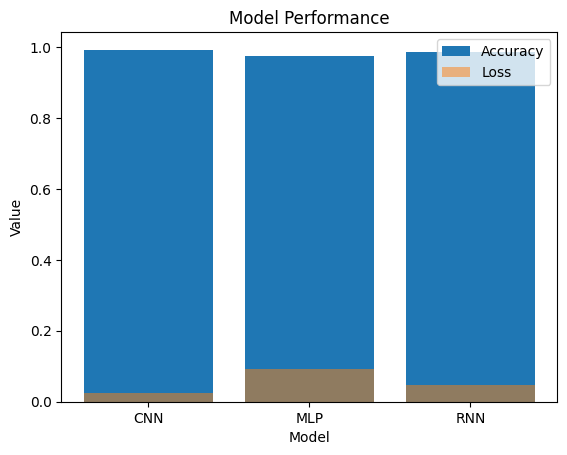

In [44]:
models = ['CNN', 'MLP', 'RNN']

# Accuracy  and loss values
accuracy = [0.9923, 0.9748, 0.9852]
loss = [0.0233, 0.0926, 0.0478]

# Create subplots
fig, ax = plt.subplots()

# Plot accuracy
ax.bar(models, accuracy, label='Accuracy')

# Plot loss
ax.bar(models, loss, label='Loss', alpha=0.5)

# Set title and labels
ax.set_title('Model Performance')
ax.set_xlabel('Model')
ax.set_ylabel('Value')
ax.legend()

plt.show()